Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

Defining a visualization function

In [2]:
def plot_image(image):
  plt.figure(figsize = (15, 15))
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.show()

Loading saved image

In [3]:
image = PIL.Image.open('map_images/Ilagan_City_states_with_border.png').convert('RGB')

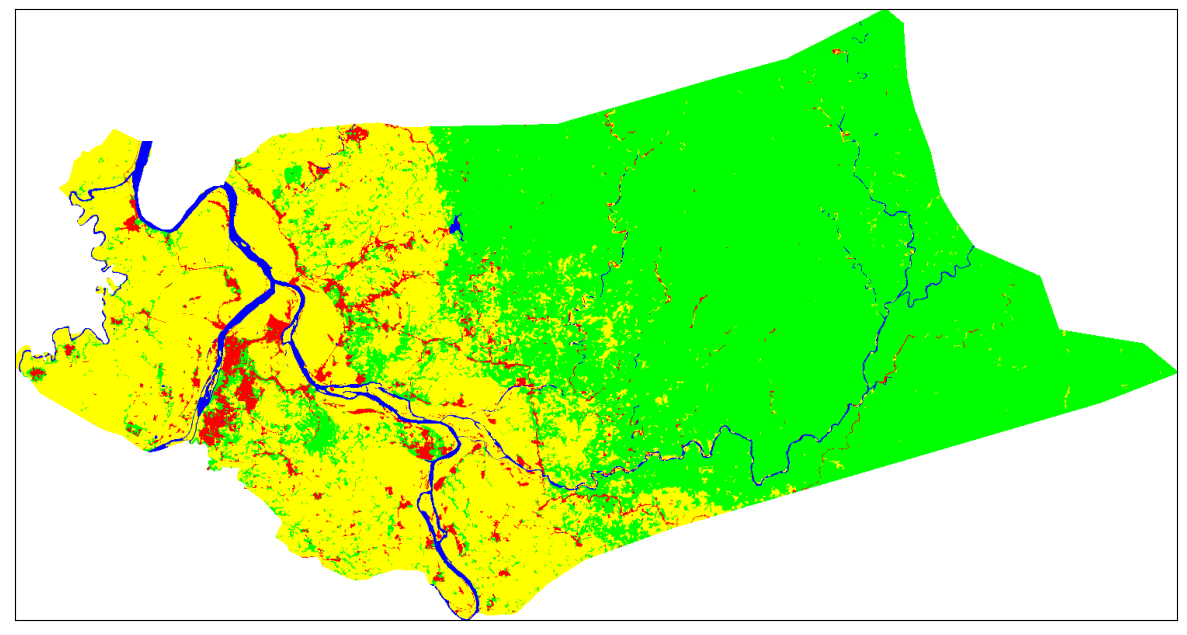

In [4]:
plot_image(image)

Getting the color array

In [5]:
im_array = np.array(image)
colors = np.unique(im_array.reshape(-1, im_array.shape[2]), axis = 0)
len(colors)

1785

In [6]:
colors

array([[  0,   0, 254],
       [  0,   0, 255],
       [  0,   1, 253],
       ...,
       [255, 254,   0],
       [255, 255,   0],
       [255, 255, 255]], dtype=uint8)

As seen above, the saved image has 1785 unique colors, instead of the expected number which is 5 (4 states plus white background). Upon inspection of the colors array and the visualization, we see that the colors are simply variations of the colors that we assigned to the states and the white background. We perform quantization to reduce the number of unique colors to 5.

Defining Palette (color of states plus white background)

In [7]:
palette = [
    0, 255, 0,     # State 0: Forests and Wooded Land 
    255, 255, 0,   # State 1: Open Land
    255, 0, 0,     # State 2: Built-up Areas
    0, 0, 255,     # State 3: Water
    255, 255, 255  # State 4: Outside Territory
]

p_img = PIL.Image.new('P', (25, 25))
p_img.putpalette(palette * (768 // len(palette)))

Image Quantization

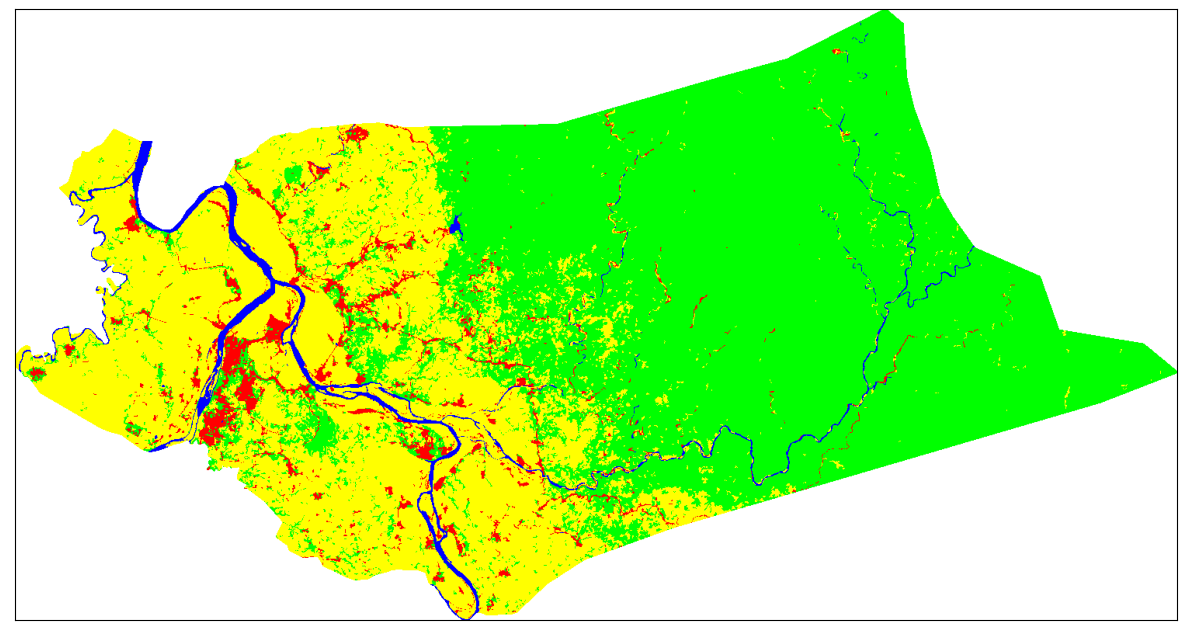

In [8]:
quantized_image = image.quantize(palette = p_img, dither = 0)
plot_image(quantized_image)

Saving the initial states

In [9]:
quant_im_array = np.array(quantized_image)
quant_im_array

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint8)

In [10]:
quant_im_array.dtype

dtype('uint8')

In [11]:
np.save('initial_states', quant_im_array)